In [1]:
import pandas as pd 
import numpy as np
import os
import re

In [2]:
df_indices= pd.read_csv(("Archivos Prueba Piloto TEST (ARCHIVOS ALT)/Balbuena1PRE.csv") , encoding='latin1')
indices = df_indices.columns
print(indices)

Index(['Identificación del Equipo', 'Dia del Análisis', 'Hora de Análisis',
       'N' de Rack', 'Posición del tubo', 'No de Muestra', 'Info de Muestra',
       'Modo de Análisis', 'ID del paciente', 'Ana. Info.',
       ...
       'Qflag(Linf. Atíp.?)', 'Qflag(NRBC?)', 'Qflag(Linf.An/Blas?)',
       'Qflag(Agluti. RBC?)', 'Qflag(Turb/HGB?)', 'Qflag(Déf. Hierro?)',
       'Qflag(Defecto HGB?)', 'Qflag(Fragmentos?)', 'Qflag(Agreg. PLT?)',
       'Qflag(PLT Grandes?)'],
      dtype='object', length=152)


In [3]:
df1 , df2 , df3 = pd.DataFrame(columns = indices), pd.DataFrame(columns = indices), pd.DataFrame(columns = indices)


In [6]:
#main

directorio = '/home/martina/Escritorio/PID/notebooks/Archivos Prueba Piloto TEST (ARCHIVOS ALT)'
lista_archivos = explorar_directorio(directorio)

#df = pd.read_csv(('/content/drive/My Drive/2024/PID/df_pacientes_copia.csv') , encoding='utf-8')

#df1 = pre; df2: prp1 (pre-frio) ; df3: prp2 (post-frio)
cargar_muestras_paciente(df1, df2, df3, directorio)
df1.head()


#df.to_csv('/content/drive/My Drive/2024/PID/df_pacientes_copia.csv', index = False)

,Identificación del Equipo,Dia del Análisis,Hora de Análisis,N' de Rack,Posición del tubo,No de Muestra,Info de Muestra,Modo de Análisis,ID del paciente,Ana. Info.,...,Qflag(Linf. Atíp.?),Qflag(NRBC?),Qflag(Linf.An/Blas?),Qflag(Agluti. RBC?),Qflag(Turb/HGB?),Qflag(Déf. Hierro?),Qflag(Defecto HGB?),Qflag(Fragmentos?),Qflag(Agreg. PLT?),Qflag(PLT Grandes?)
BAL 23/11/2023,XS-1000i^74612,23/11/2023,09:20:43,8.0,10,1Pre,A,Muestreador,BAL,Normal,...,0,20,10,70,90,80,80,0,10,20
BAL 07/12/2023,XS-1000i^74612,07/12/2023,09:03:44,6.0,9,2PRE,A,Muestreador,BAL,Normal,...,0,10,0,70,90,80,80,0,10,10
BAL 21/12/2023,XS-1000i^74612,21/12/2023,09:03:17,NaN,0,3PRE,M,Manual,BAL,Normal,...,0,0,0,70,80,80,80,0,20,20
COL 23/11/2023,XS-1000i^74612,23/11/2023,09:19:27,8.0,9,1PRE,A,Muestreador,COL,Normal,...,20,0,0,60,90,80,80,0,10,30
COL 07/12/2023,XS-1000i^74612,07/12/2023,10:50:58,12.0,10,2PRE,A,Muestreador,COL,Normal,...,10,0,0,60,90,80,80,0,60,30


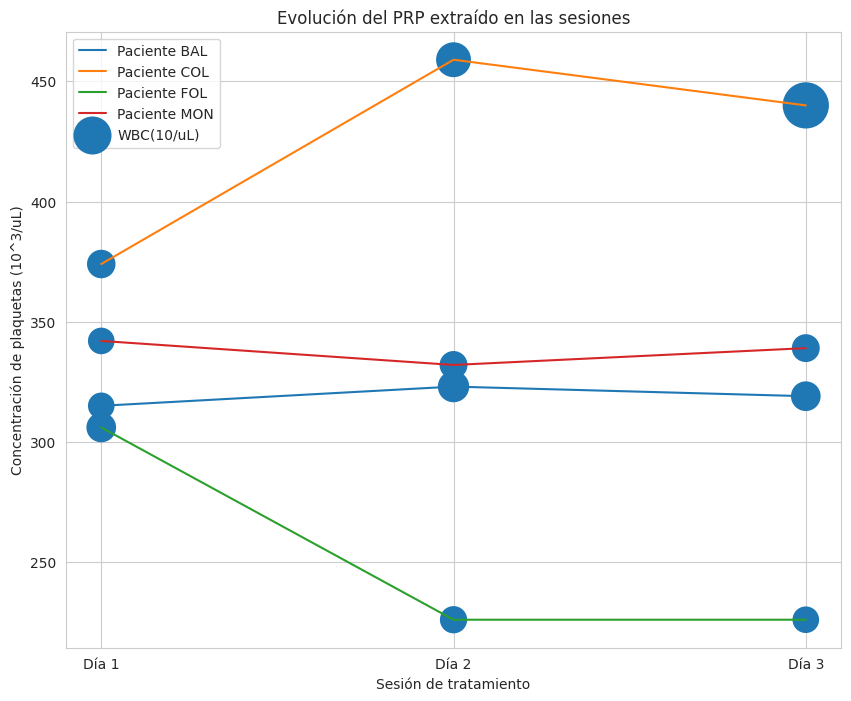

In [31]:
sns.set_style("whitegrid")
palette = sns.color_palette("Set2")

val_scatter = 'WBC(10/uL)'
scatter_list = df2[val_scatter].tolist()
nuevo_min = 200
nuevo_max = 800

sc_size_norm = []
maximo , minimo = max(scatter_list) , min(scatter_list)
for valor in scatter_list:
    val_norm = (valor - minimo) / (maximo - minimo)
    x_final = nuevo_min + (val_norm * (nuevo_max - nuevo_min))
    sc_size_norm.append(x_final)


id_pacientes = df2['ID del paciente'].unique().tolist()

plt.figure(figsize=(10, 8)) 

#colores = ['blue', 'green', 'red', 'yellow']

for id_paciente in id_pacientes:
    muestras_paciente = df2[df2['ID del paciente'] == id_paciente]

    numeros_muestra = muestras_paciente['No de Muestra']

    val_interes = muestras_paciente['PLT(10^3/uL)']
    plt.plot(numeros_muestra, val_interes , label=f'Paciente {id_paciente}')

plt.scatter(df2['No de Muestra'], df2['PLT(10^3/uL)'], linewidth=5  ,  s=sc_size_norm, label=val_scatter)
plt.legend()

plt.xlabel('Sesión de tratamiento')
plt.xticks([0,1, 2], ['Día 1', 'Día 2', 'Día 3'])
plt.ylabel('Concentración de plaquetas (10^3/uL)')
plt.title('Evolución del PRP extraído en las sesiones')

plt.show()

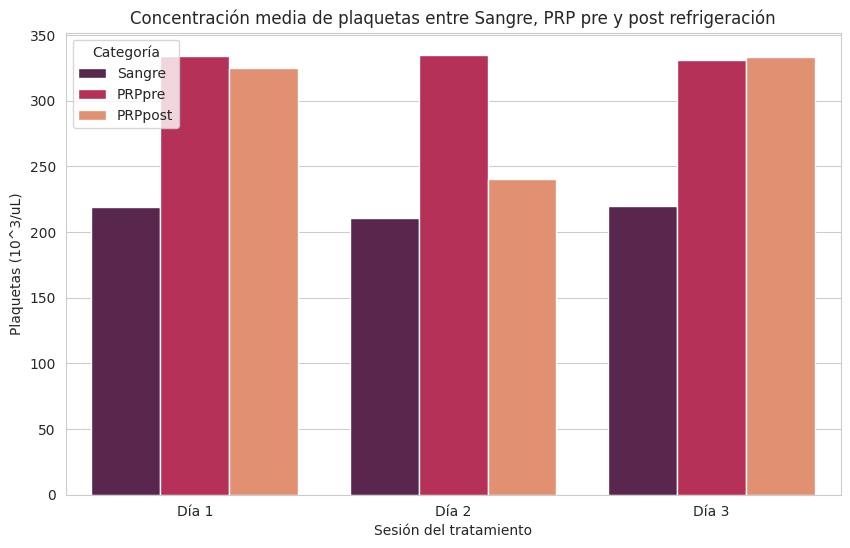

In [55]:
# medias_plt1 = [210.50, 219.75, 219.25]  # Medias de plaquetas para Sangre
# medias_plt2 = [335.00, 331.00, 334.25]  # Medias de plaquetas para PRPpre
# medias_plt3 = [240.67, 333.25, 324.75]  # Medias de plaquetas para PRPpost

medias_plt1 = df1.groupby("Dia del Análisis")['PLT(10^3/uL)'].mean()
medias_plt2 = df2.groupby("Dia del Análisis")['PLT(10^3/uL)'].mean()
medias_plt3 = df3.groupby("Dia del Análisis")['PLT(10^3/uL)'].mean()

df_barplot_plt = pd.DataFrame({
    'Dia del Análisis': ['07/12/2023', '21/12/2023', '23/11/2023'],
    'Sangre': medias_plt1,
    'PRPpre': medias_plt2,
    'PRPpost': medias_plt3
})


# reorganizacion
df_barplot_plt = pd.melt(df_barplot_plt, id_vars=['Dia del Análisis'], var_name='Categoría', value_name='Plaquetas (10^3/uL)')

df_barplot_plt['Dia del Análisis'] = pd.to_datetime(df_barplot_plt['Dia del Análisis'], format='%d/%m/%Y')
df_barplot_plt = df_barplot_plt.sort_values(by='Dia del Análisis')
df_barplot_plt['Dia del Análisis'] = df_barplot_plt['Dia del Análisis'].dt.strftime('%d/%m/%Y')


plt.figure(figsize=(10, 6)) 
sns.barplot(data=df_barplot_plt, x='Dia del Análisis', y='Plaquetas (10^3/uL)', hue='Categoría', palette='rocket')
plt.xlabel('Sesión del tratamiento')
plt.xticks([0,1, 2], ['Día 1', 'Día 2', 'Día 3'])
plt.ylabel('Plaquetas (10^3/uL)')
plt.title('Concentración media de plaquetas entre Sangre, PRP pre y post refrigeración')
plt.legend(title='Categoría')



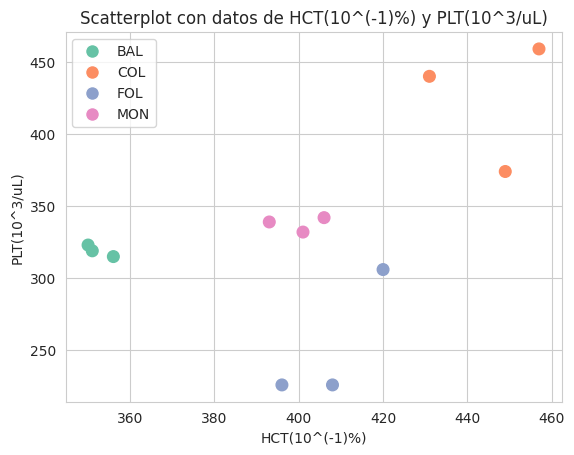

In [51]:
#Scatter de htc y plt
var_x , var_y = 'HCT(10^(-1)%)' , 'PLT(10^3/uL)'
x_values = df1[var_x]
y_values = df2[var_y]

id_pacientes = df1['ID del paciente']

palette = sns.color_palette("Set2", len(id_pacientes.unique()))  
paciente_color_map = {paciente: color for paciente, color in zip(id_pacientes.unique(), palette)}
colors = [paciente_color_map[paciente] for paciente in id_pacientes]


plt.scatter(x_values, y_values, c=colors, s=70)

plt.xlabel(var_x)
plt.ylabel(var_y)
plt.title(f'Scatterplot con datos de {var_x} y {var_y}')

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=paciente)
           for paciente, color in paciente_color_map.items()]
plt.legend(handles=handles)

plt.show()

/tmp/ipykernel_2196/3832831349.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Día 1', 'Día 2', 'Día 3'])
/tmp/ipykernel_2196/3832831349.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Día 1', 'Día 2', 'Día 3'])
/tmp/ipykernel_2196/3832831349.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Día 1', 'Día 2', 'Día 3'])
/tmp/ipykernel_2196/3832831349.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Día 1', 'Día 2', 'Día 3'])


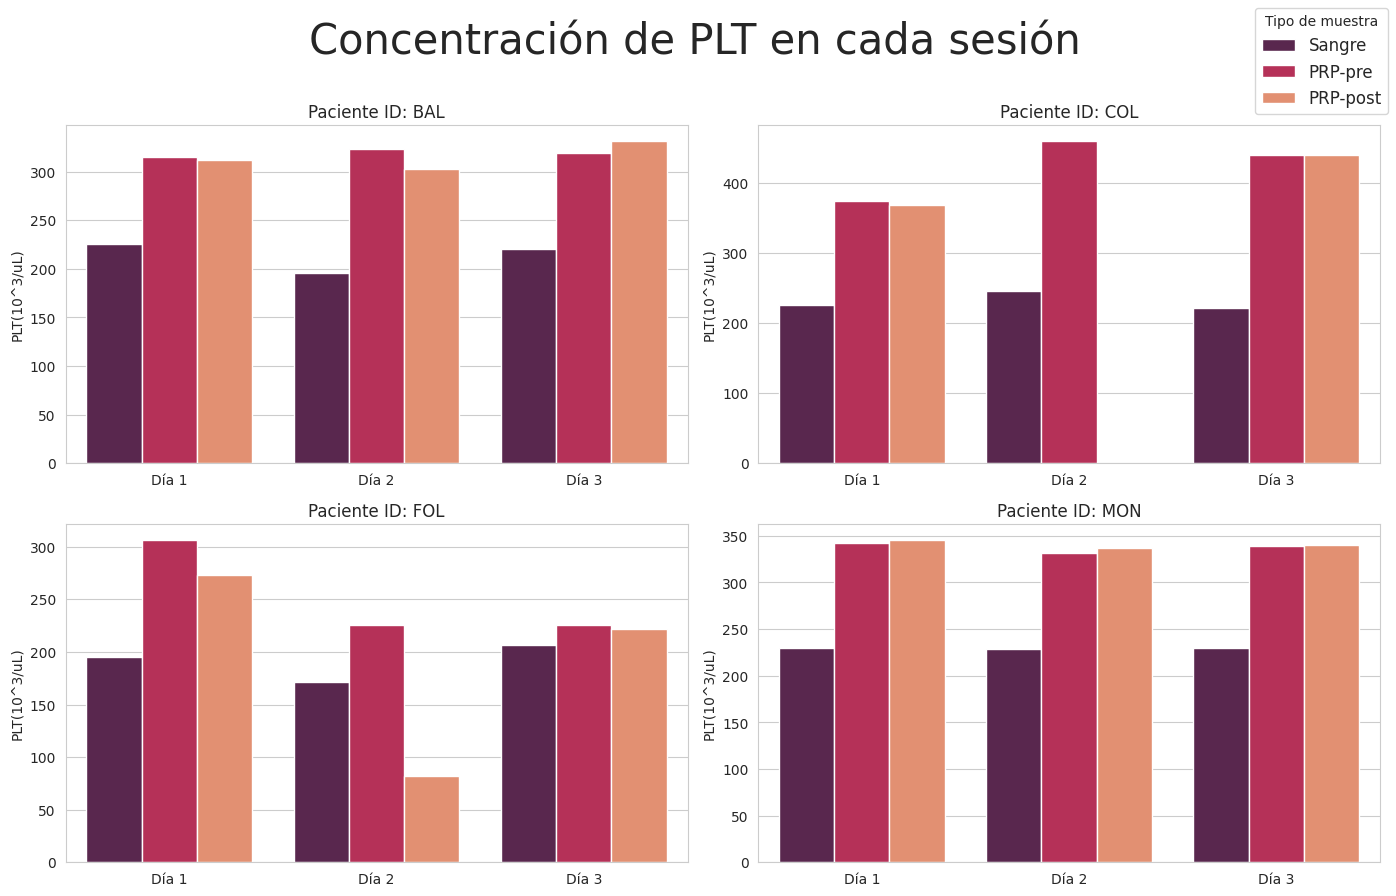

In [54]:
columnas_seleccionadas = ['ID del paciente', 'Dia del Análisis', 'PLT(10^3/uL)']
id_pacientes = df2['ID del paciente'].unique().tolist()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for ax, pac in zip(axes.flatten(), id_pacientes):
    nuevo_df = pd.DataFrame()
    etiquetas_muestras = ['Sangre', 'PRP-pre', 'PRP-post']

    for df, etiqueta in zip([df1, df2, df3], etiquetas_muestras):
        columnas_df_seleccionadas = df[df['ID del paciente'] == pac][columnas_seleccionadas].copy()
        columnas_df_seleccionadas['n_muestra'] = etiqueta
        nuevo_df = pd.concat([nuevo_df, columnas_df_seleccionadas], axis=0)

    nuevo_df['Dia del Análisis'] = pd.to_datetime(nuevo_df['Dia del Análisis'], format='%d/%m/%Y')
    nuevo_df = nuevo_df.sort_values(by='Dia del Análisis')

    sns.barplot(data=nuevo_df, x='Dia del Análisis', y='PLT(10^3/uL)', hue='n_muestra', palette='rocket', ax=ax)
    ax.set_xlabel('')
    ax.set_xticklabels(['Día 1', 'Día 2', 'Día 3'])
    ax.set_ylabel('PLT(10^3/uL)')
    ax.set_title(f'Paciente ID: {pac}')
    ax.tick_params(axis='x')
    ax.get_legend().remove()  

#leyenda comun
handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', title='Tipo de muestra', fontsize='large')

fig.suptitle('Concentración de PLT en cada sesión', fontsize = 30)
plt.tight_layout(rect=[0, 0.10, 1, 0.97])

plt.show()